Keith Farrugia 11104L 

# Imports

In [1]:
import os
from scipy import signal
import numpy as np
import math
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd
from typing import List

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Fourier Synthesis

## Function $a_{n}$

In [2]:
def a_n (n : int) :
    if (n % 2 == 0):
        return 0
    elif (n % 2 == 1) :
        return 4/(math.pow (math.pi,2) * math.pow(n, 2))

## Coefficients s an for n ∈ [−10, 10]

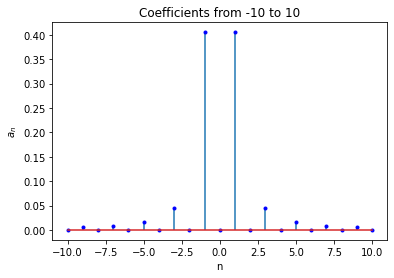

In [3]:
def calcCoeff (range_start:int, range_end:int):
    array = [0] * (np.absolute(range_start) + np.absolute(range_end)+1)
   
    for i in range (0, len(array)) :
        array[i] = a_n(range_start + i)
    return array

y = calcCoeff(-10, 10)

x = np.arange(-10, 11)

plt.figure()
plt.stem(x,y,markerfmt='b.')
plt.xlabel('n')
plt.ylabel('$a{_n}$')
plt.title('Coefficients from -10 to 10')
plt.show()

## Simplify the truncated function

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = -n_{max}}^{n_{max}} a_{k} e^{jkw_{0}t}$

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = -n_{max}}^{n_{max}} a_{k}cos(kw_{0}t) + a_{k}jsin(kw_{0}t)$

In order to plot the function, it first must be simplified.

Since the function An() is symetric about 0 the summation can be simplified in the following manner

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = -n_{max}}^{n_{max}} a_{k} e^{jkw_{0}t}$

$\hat{f}(t, ω_{0}, nmax) = a_{0}e^{j(0)w_{0}t} +\displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}e^{jkw_{0}t} + a_{k}e^{j(-k)w_{0}t}$

$\hat{f}(t, ω_{0}, nmax) = a_{0}*1 +\displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}e^{jkw_{0}t} + a_{k}e^{-jkw_{0}t}$

But at 0:$a_{n}$ = 0

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}e^{jkw_{0}t} + a_{k}e^{-jkw_{0}t}$

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}cos(kw_{0}t) + a_{k}jsin(kw_{0}t) + a_{k}cos(-kw_{0}t) + a_{k}jsin(-kw_{0}t)$

Since sin(-x) = -sin(x) and cos(-x) = cos(x)

$\hat{f}(t, ω_{0}, nmax) = \displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}cos(kw_{0}t) + a_{k}jsin(kw_{0}t) + a_{k}cos(kw_{0}t) + -a_{k}jsin(kw_{0}t)$

hence the final statement

$\hat{f}(t, ω_{0}, nmax) = 2\displaystyle\sum\limits_{k = 1}^{n_{max}} a_{k}cos(kw_{0}t)$

## Implementing $\hat{f}$ (fhat)

In [4]:
def fhat (t:int, omega0:int , n_max:int):
    total = 0
    for k in range(1, n_max+1):
        total += a_n(k)*np.cos(k*omega0*t)
    return 2*total

## Plotting of truncated Fourier Synthesis

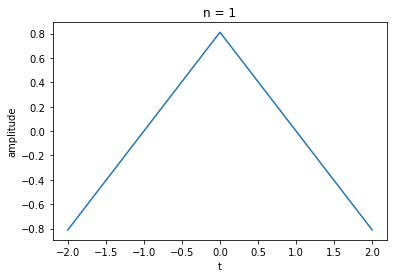

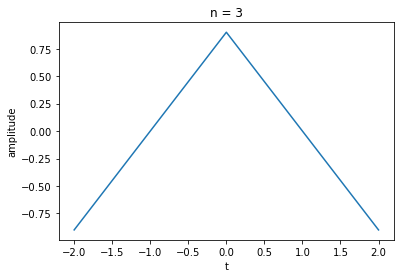

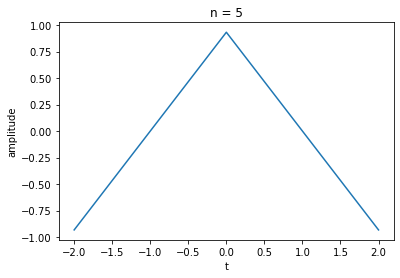

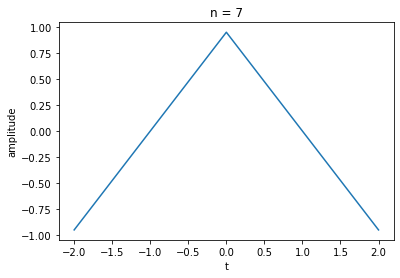

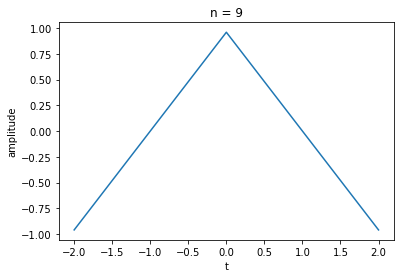

In [5]:
def fhat_array(t_start:int, t_end:int, n_max:int):
    period_T:int = 4
    omega0:int = (2*math.pi) / period_T
    array = [0] * (np.absolute(t_start) + np.absolute(t_end)+1)
    for t in range (0, len(array)) :
        array[t] = fhat(t_start+t, omega0, n_max)
    return array

def plot_Arrays(n_max):
    x = np.arange(-2, 3)
    for n in range(0, len(n_max)):
        y = fhat_array(-2, 2, n_max[n])
        plt.figure()
        plt.plot(x,y)
        plt.title('n = ' + str(n_max[n]))
        plt.xlabel('t')
        plt.ylabel('amplitude')
        plt.show()

plot_Arrays([1,3,5,7,9])

### Comparison of truncated Fourier Synthesis

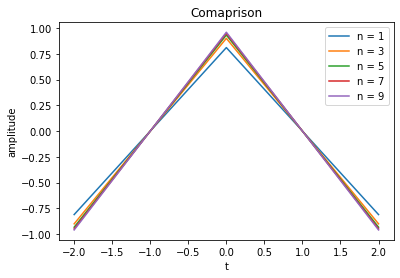

In [6]:
def plot_Arrays_Together(n_max):
    x = np.arange(-2, 3)
    plt.figure()
    plt.subplot()
    plt.title('Comaprison')
    for n in range(0, len(n_max)):
        y = fhat_array(-2, 2, n_max[n])
        plt.plot(x,y, label = 'n = ' + str(n_max[n]))
        plt.xlabel('t')
        plt.ylabel('amplitude')
    plt.legend()
    plt.show()
    
plot_Arrays_Together([1,3,5,7,9])

# Error Analysis

## Defnining f(t)

In [7]:
def f(t):
    if  (t >=  0 & t <= 2):
        return 1-t
    elif(t >= -2 & t <= 0):
        return 1+t
    else:
        return 0

def f_array (t_start:int, t_end:int):
    array = [0] * (np.absolute(t_start) + np.absolute(t_end)+1)
    for i in range(0, len(array)):
        array[i] = f(t_start + i)

    return array

## Plotting the errors

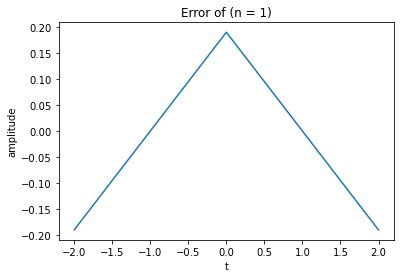

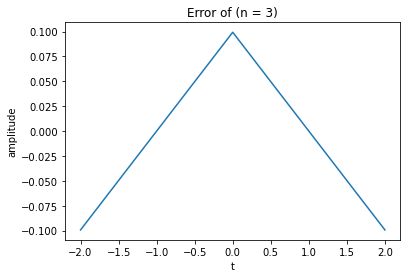

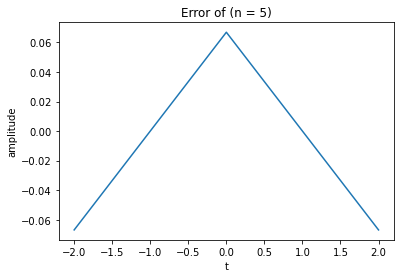

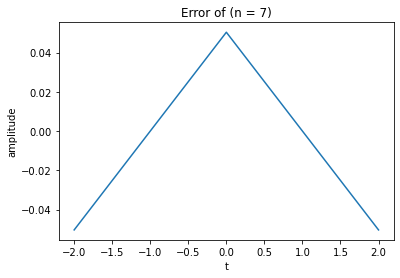

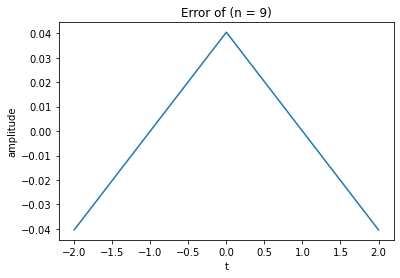

In [8]:
def calc_error(y_1, y_2):
    array = [0] * (min(len(y_1), len(y_2)))
    for i in range (0, min(len(y_1), len(y_2))):
        array[i] = y_1[i] - y_2[i]
    return array

y_f = f_array (-2, 2)

def plot_Error_Arrays(n_max):
    x = np.arange(-2, 3)
    for n in range(0, len(n_max)):

        y_fhat = fhat_array (-2, 2, n_max[n])
        y_error = calc_error(y_f,y_fhat)
        
        plt.figure()
        plt.plot(x,y_error)
        plt.title('Error of (n = ' + str(n_max[n])+')')
        plt.xlabel('t')
        plt.ylabel('amplitude')
        plt.show()
plot_Error_Arrays([1,3,5,7,9])

## Comparing errors of truncated Fourier Syntesis

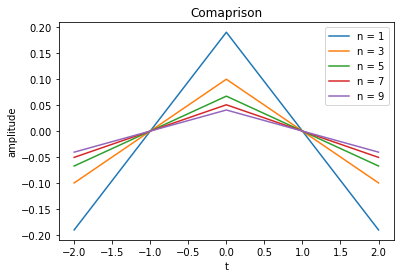

In [9]:
def plot_Arrays_Together_Error(n_max):
    x = np.arange(-2, 3)
    plt.figure()
    plt.subplot()
    plt.title('Comaprison')
    y_f = f_array (-2, 2)
    for n in range(0, len(n_max)):
        y_fhat = fhat_array (-2, 2, n_max[n])
        y_error = calc_error(y_f,y_fhat)
        plt.plot(x,y_error, label = 'n = ' + str(n_max[n]))
        plt.xlabel('t')
        plt.ylabel('amplitude')
    plt.legend()
    plt.show()
    
plot_Arrays_Together_Error([1,3,5,7,9])

## Function E

In [10]:
def E(y_1, y_2, x):
    array = [0] * (min(len(y_1), len(y_2)))
    for i in range (0, min(len(y_1), len(y_2))):
        array[i] = np.power(np.absolute(y_1[i] - y_2[i]),2)
    
    return np.trapz(x, array)

## Plotting Of Values

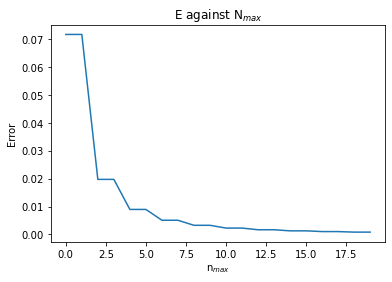

In [11]:
def E_array(n_max):
    y_f = f_array (-2, 2)
    x = np.arange(-2, 3)
    e_array = [0]*(len(n_max))
    for n in range(0, len(n_max)):
        y_fhat = fhat_array(-2, 2, n_max[n])
        e_array[n] = E(y_f, y_fhat, x)
    return e_array

e_array = E_array(np.arange(1,21))
plt.figure()
plt.plot(e_array)
plt.title('E against N${_{max}}$')
plt.xlabel('n${_{max}}$')
plt.ylabel('Error')
plt.show()

## Results
The results show that as the number of coefficients increases, the error values decrease. The graph becomes more accurate to the one plotted from F(). It can also be seen that although the error is decreasing, the more coefficiencts that are added the less of an effect it will have hence giving diminishing returns.